# Importar Librerías 


In [173]:
# Manipulación de datos 
import pandas as pd 
import numpy as np 
import math 
import datetime as dt 
# Visualización de datos 
import seaborn as sns 
import matplotlib.pyplot as plt 
# Libreria Estadistica 
import scipy.stats as st 

# Importar Datasets 
Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

## Telecom Dataset 
- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

In [106]:
data = pd.read_csv('telecom_dataset_us.csv')
data.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62


## Telecom Clients 
- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

In [107]:
clients = pd.read_csv('telecom_clients_us.csv')
clients.head(10)

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
5,167764,A,2019-09-30
6,167050,A,2019-08-29
7,168252,A,2019-10-17
8,168495,A,2019-10-28
9,167879,A,2019-10-03


# Preprocesamiento de Datos 

## Valores Ausentes 

### Data_Df

In [108]:
# Usar 'isna()' para ver la cantidad de valores ausentes en las distintas columnas del df
data.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Vemos que la columna con el identificador de los operarios tiene varios valores ausentes, por lo que al ser esta la columna con los valores ausentes lo mejor es eliminar todos estos valores ausentes ya que estos no nos ayudan con nuestro objetivo que es identificar a los operarios ineficientes y en este caso hace falta una de las cosas más importantes que es el identificador del usuario

In [109]:
# Eliminar valores duplicados 
data.dropna(subset='operator_id', inplace=True)

### Clients_Df

In [110]:
clients.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

El dataset con la información de los clientes no tiene valores ausentes

## Tipos de datos correctos

### Data_DF

In [111]:
# Ver información general del dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45730 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45730 non-null  int64  
 1   date                 45730 non-null  object 
 2   direction            45730 non-null  object 
 3   internal             45670 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       45730 non-null  bool   
 6   calls_count          45730 non-null  int64  
 7   call_duration        45730 non-null  int64  
 8   total_call_duration  45730 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.2+ MB


En la información general del df se logra observar que hay varias columnas con el tipo de dato incorrecto para lo que significan, por ejemplo: las columnas que guardan los identificadores tanto de los usuarios como de los operadores son de tipo 'int' y para este tipo de información es mejor que se trabajen como strings, también con la columna date, esta debería ser de tipo datetime.

In [112]:
# Convertir los ID a tipo object
data[['user_id','operator_id']] = data[['user_id','operator_id']].astype(str)
# Convertir la columna referente a las fechas a tipo datetime  
data['date'] = pd.to_datetime(data['date'])
# Eliminar la zona horaria
data['date'] = data['date'].dt.tz_convert(None)
# Reemplazar la columna existente con solo la fecha en tipo datetime
data['date'] = pd.to_datetime(data['date'].dt.date)

### Clients_Df

In [113]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


En el df de los clientes solo se tiene que cambiar el tipo de datos para la columna 'user_id' y 'date_start' a tipo object y datetime respectivamente

In [114]:
# Convertir a tipo object
clients['user_id'] = clients['user_id'].astype(str)
# Convertir a datetime
clients['date_start'] = pd.to_datetime(clients['date_start'])

## Valores Ausentes 

### Data_Df

In [115]:
data.duplicated().sum()

4184

In [116]:
data = data.drop_duplicates()

### Clients_Df

In [117]:
clients.duplicated().sum()

0

# Análisis Exploratorio de Datos 
En este analisis exploratorio las caracteristicas a estudiar seran las llamadas perdidas, tiempo de espera en las llamadas y la cantidad de llamadas realizadas por los operadores.

Recordemos que para considerar a un operador como ineficiente tiene que cumplir estas caracteristicas: 
+ Muchas llamadas perdidad entrantes  
+ Tiempo de espera muy prolongado 
+ Pocas llamadas realizadas

Al estudiar y analizar la distribucion de estas caracteristicas podremos establecer los umbrales para determinar a partir de cuando un operador es ineficiente, algo que puede ser de bastante ayuda al definir los umbrales son los percentiles, ya que estos nos ayudan a tener una de idea de que valores son normales y cuales no.

In [118]:
# Unir los df en uno solo
telecom = data.merge(clients, on='user_id',how='left')
# Definir una funcion para calcular percentiles
def percentiles(df,column): 
    result = np.percentile(df[column], [90,95,99])
    return result

## Llamadas perdidas

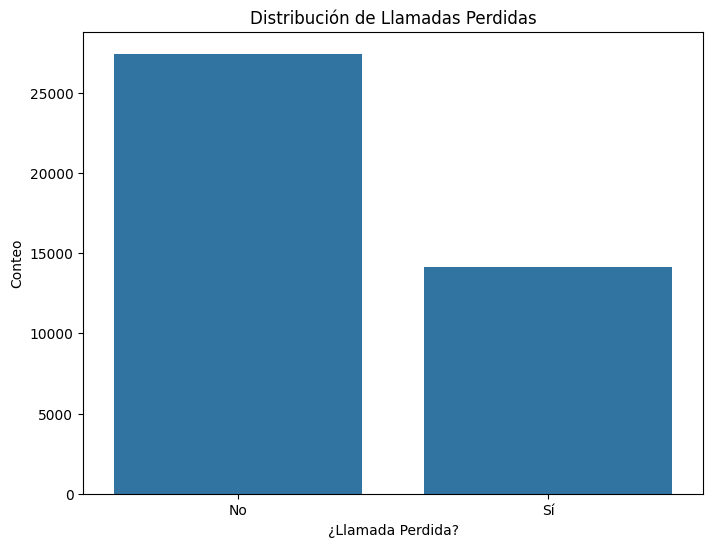

In [119]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_missed_call', data=telecom)
plt.title('Distribución de Llamadas Perdidas')
plt.xlabel('¿Llamada Perdida?')
plt.ylabel('Conteo')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

In [120]:
# Filtrar el DF con los valores de aquellas llamadas entrantes que no se contestan  
missed_calls = telecom[(telecom['is_missed_call']==True) & (telecom['direction']=='in')]
# Contar cuantas llamadas perdidas tiene cada operador 
m_calls = missed_calls.groupby('operator_id',as_index=False)['is_missed_call'].count().sort_values(by='is_missed_call', ascending=False)

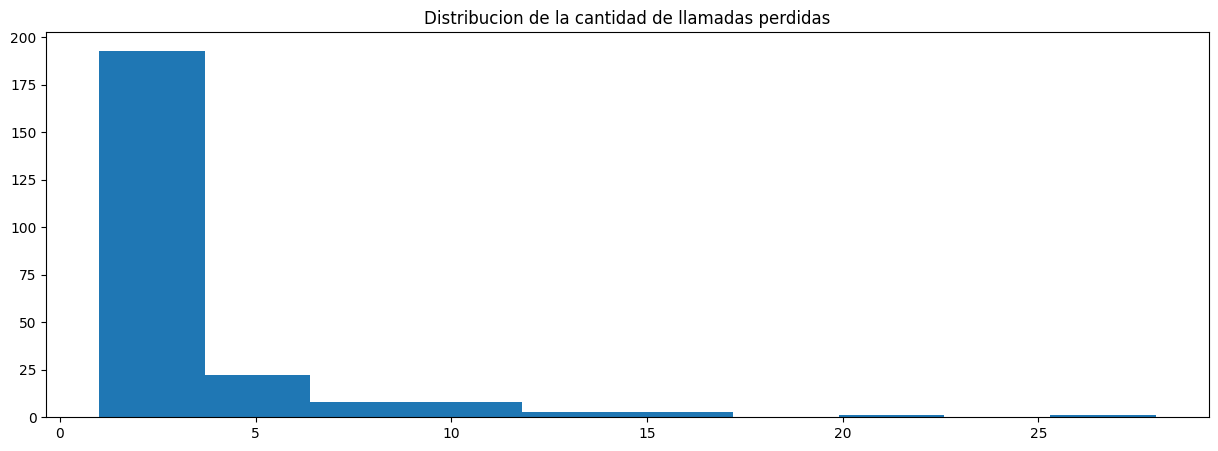

In [121]:
# Ver distribucion de las llamadas entrantes perdidas
plt.figure(figsize=(15,5))
plt.hist(m_calls['is_missed_call'])
plt.title('Distribucion de la cantidad de llamadas perdidas')
plt.show()

In [122]:
# Ver los percentiles de las llamadas perdidas 
print(f'Los percentiles 90, 95 y 99 de las llamadas perdidas son: {percentiles(m_calls,'is_missed_call')} y la media de llamadas perdidas es: {round(m_calls['is_missed_call'].mean(),2)}')

Los percentiles 90, 95 y 99 de las llamadas perdidas son: [ 6.2  10.1  16.62] y la media de llamadas perdidas es: 2.87


Los resultados obtenidos nos muestran que en promedio los operadores tienen 2.87 llamadas entrantes perdidas y que el 95% de ellos tiene como maximo 10 llamadas entrantes perdidas, por lo que se concluye que aquellos operadores que tienen mas de 10 llamadas entrantes perdidas ya cumplen con una caracteristica para ser catalogado como operador ineficiente

## Tiempo de espera en llamadas

In [147]:
# Calcular el tiempo de espera para las llamadas entrantes
incoming_calls = telecom[telecom['direction']=='in']
# Crear columna con el tiempo de espera en minutos 
incoming_calls['waiting_min'] = (incoming_calls['total_call_duration'] - incoming_calls['call_duration']) / 60

C:\Users\User\AppData\Local\Temp\ipykernel_17728\655232825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incoming_calls['waiting_min'] = (incoming_calls['total_call_duration'] - incoming_calls['call_duration']) / 60


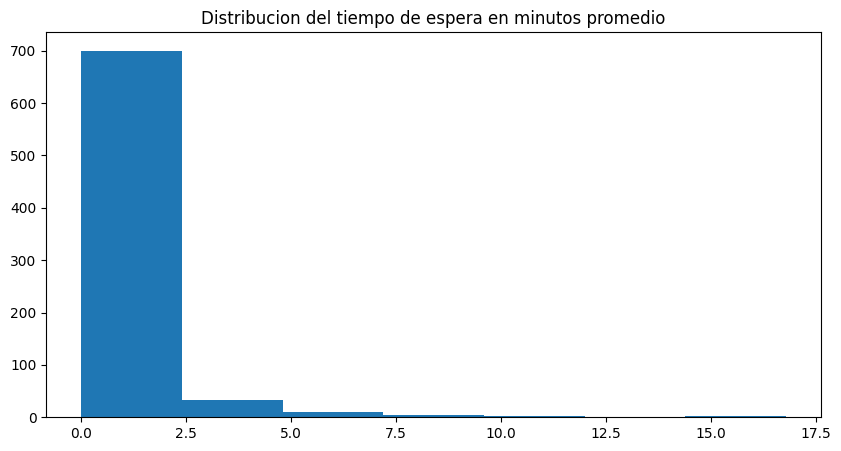

In [138]:
# Calcular el tiempo de espera promedio por operador 
mean_wait_time = incoming_calls.groupby('operator_id',as_index=False)['waiting_min'].mean().sort_values(by='waiting_min', ascending=False)
# Visualizar distribucion del tiempo de espera 
plt.figure(figsize=(10,5))
plt.hist(mean_wait_time['waiting_min'], bins=7)
plt.title('Distribucion del tiempo de espera en minutos promedio')
plt.show()

In [154]:
mean_wait_time

,operator_id,waiting_min
337,919794.0,16.789583
206,906070.0,14.830000
335,919790.0,14.446721
445,931458.0,11.366026
358,921318.0,10.256970
...,...,...
404,926872.0,0.024359
677,952982.0,0.019444
636,948282.0,0.016667
644,949420.0,0.016667


In [146]:
mean_wait_time['waiting_min'].describe()

count    754.000000
mean       0.960213
std        1.574279
min        0.016667
25%        0.291667
50%        0.516667
75%        0.966667
max       16.789583
Name: waiting_min, dtype: float64

In [139]:
# Calcular los percentiles del tiempo de espera
print(f'Los percentiles 90, 95 y 99 del tiempo de espera son: {percentiles(mean_wait_time,'waiting_min')}')

Los percentiles 90, 95 y 99 del tiempo de espera son: [1.90083333 3.12355801 8.97064311]


En base a los resultados obtenidos, concluimos que aquellos operadores que muestren un promedio de +6 min de tiempo de espera en llamadas entrantes ya cumplen con otra caracteristica para ser determinados como operadores ineficientes 

## Llamadas realizadas

In [141]:
# Filtrar por las llamadas de salida
outgoing_calls = telecom[telecom['direction']=='out']
# Agrupar a los operadores con la cantidad de llamadas que realizaron 
calls_by_ops = outgoing_calls.groupby('operator_id', as_index=False)['direction'].count()

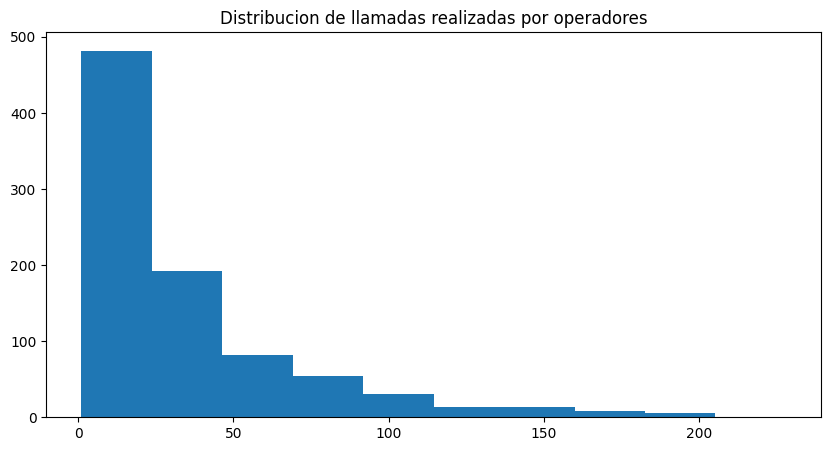

In [142]:
# Visualizar distribucion de las llamadas realizadas por los operadores
plt.figure(figsize=(10,5))
plt.hist(calls_by_ops['direction'])
plt.title('Distribucion de llamadas realizadas por operadores')
plt.show()

In [145]:
# Analizar las estadisticas descriptivas de las llamadas realizadas por los operadores
calls_by_ops['direction'].describe()

count    882.000000
mean      32.667800
std       38.145841
min        1.000000
25%        5.000000
50%       19.000000
75%       45.000000
max      228.000000
Name: direction, dtype: float64

In [143]:
# Calcular los percentiles de las llamadas realizadas 
print(f'Los percentiles 90, 95 y 99 de las llamadas realizadas por los operadores son: {percentiles(calls_by_ops,'direction')}')

Los percentiles 90, 95 y 99 de las llamadas realizadas por los operadores son: [ 83.   110.95 170.  ]


En base a los resultados obtenidos se concluye que los operadores deben de tener al menos 45 llamadas realizadas para evitar ser considerados como operadores ineficientes

# Identificar Operadores Ineficientes

Ya que tenemos los umbrales definidos ya sabemos que aquellos operadores con mas de 10 llamadas entrantes perdidas, mas de 6 minutos de espera y menos de 45 llamadas realizadas son considerados operadores ineficientes.

In [162]:
# Crear lista de operadores ineficientes
bad_ops = []

# Filtrar los operadores con mas de 10 llamadas perdidas
many_missed_calls = (m_calls['operator_id'][m_calls['is_missed_call'] > 10]).tolist()
bad_ops.extend(many_missed_calls)

# Añadir operadores con un tiempo de espera promedio mayor a 6 minutos
inefficient_waiting = mean_wait_time[mean_wait_time['waiting_min'] > 6]['operator_id'].tolist()
bad_ops.extend(inefficient_waiting)

# Filtrar los operadores con menos de 45 llamadas
inefficient_calls = calls_by_ops[calls_by_ops['direction'] < 45]['operator_id'].tolist()
bad_ops.extend(inefficient_calls)

# Eliminar duplicados en caso de que existan operadores ya presentes en bad_ops
bad_ops = list(set(bad_ops))

In [182]:
# Filtrar los operadores ineficientes 
inefficients = telecom[telecom['operator_id'].isin(bad_ops)]
# Filtrar los operadores eficientes 
efficients = telecom[~telecom['operator_id'].isin(bad_ops)]

# Hipotesis

Hipótesis 1: Los operadores ineficaces tienen un mayor número de llamadas entrantes perdidas.
+ Hipótesis nula (H0): No hay diferencia significativa en el número de llamadas entrantes perdidas entre operadores ineficaces y eficientes.
+ Hipótesis alternativa (H1): Los operadores ineficaces tienen un mayor número de llamadas entrantes perdidas que los operadores eficientes.

Hipótesis 2: Los operadores ineficaces tienen un tiempo de espera promedio mayor para las llamadas entrantes.
+ Hipótesis nula (H0): No hay diferencia significativa en el tiempo de espera promedio para las llamadas entrantes entre operadores ineficaces y eficientes.
+ Hipótesis alternativa (H1): Los operadores ineficaces tienen un tiempo de espera promedio mayor para las llamadas entrantes que los operadores eficientes.

Hipótesis 3: Los operadores ineficaces realizan un número reducido de llamadas salientes.
+ Hipótesis nula (H0): No hay diferencia significativa en el número de llamadas salientes realizadas entre operadores ineficaces y eficientes.
+ Hipótesis alternativa (H1): Los operadores ineficaces realizan un número reducido de llamadas salientes en comparación con los operadores eficientes.

Pruebas Estadísticas

Usaremos la prueba t de Student para comparar las medias de ambos grupos. Dado que estamos interesados en verificar si los operadores ineficaces tienen mayores valores en algunas métricas, realizaremos pruebas t de una cola.

In [178]:
# Función para interpretar los resultados de la prueba t
def interpretar_prueba(p_val, alpha=0.05):
    if p_val < alpha:
        return f"p_val={p_val:.2e}, Se rechaza la hipótesis nula."
    else:
        return f"p_val={p_val:.2e}, No se rechaza la hipótesis nula."


# Interpretaciones específicas
interpretaciones = {
    "Hipótesis 1": "Los operadores ineficaces tienen un mayor número de llamadas entrantes perdidas.",
    "Hipótesis 2": "Los operadores ineficaces tienen un tiempo de espera promedio mayor para las llamadas entrantes.",
    "Hipótesis 3": "No hay evidencia suficiente para concluir que los operadores ineficaces realizan un número reducido de llamadas salientes."
}

# Declarar el valor alpha 
alpha = 0.05

## Hipotesis 1


In [179]:
# Hipótesis 1: Número de llamadas entrantes perdidas
t_stat_missed_calls, p_val_missed_calls = st.ttest_ind(
    inefficients['is_missed_call'],
    efficients['is_missed_call'],
    alternative='greater'  # Prueba de una cola, mayor número de llamadas perdidas
)
# Hipótesis 1
resultado_missed_calls = interpretar_prueba(p_val_missed_calls, alpha)
print(f"Hipótesis 1 (Número de llamadas perdidas): {resultado_missed_calls} \n")
print(f"Hipótesis 1: {interpretaciones['Hipótesis 1'] if 'rechaza' in resultado_missed_calls else 'No se rechaza la hipótesis nula.'}")

Hipótesis 1 (Número de llamadas perdidas): p_val=8.52e-04, Se rechaza la hipótesis nula. 

Hipótesis 1: Los operadores ineficaces tienen un mayor número de llamadas entrantes perdidas.


## Hipotesis 2


In [180]:
# Hipótesis 2: Tiempo de espera promedio para llamadas entrantes
# Crear columnas con el tiempo de espera en minutos 
inefficients['waiting_min'] = (inefficients['total_call_duration'] - inefficients['call_duration']) / 60
efficients['waiting_min'] = (efficients['total_call_duration'] - efficients['call_duration']) / 60

t_stat_waiting, p_val_waiting = st.ttest_ind(
    inefficients['waiting_min'],
    efficients['waiting_min'],
    alternative='greater'  # Prueba de una cola, mayor tiempo de espera
)

# Hipótesis 2
resultado_waiting = interpretar_prueba(p_val_waiting, alpha)
print(f"Hipótesis 2 (Tiempo de espera promedio): {resultado_waiting} \n")
print(f"Hipótesis 2: {interpretaciones['Hipótesis 2'] if 'rechaza' in resultado_waiting else 'No se rechaza la hipótesis nula.'}")

Hipótesis 2 (Tiempo de espera promedio): p_val=3.17e-114, Se rechaza la hipótesis nula. 

Hipótesis 2: Los operadores ineficaces tienen un tiempo de espera promedio mayor para las llamadas entrantes.


C:\Users\User\AppData\Local\Temp\ipykernel_17728\2939969764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inefficients['waiting_min'] = (inefficients['total_call_duration'] - inefficients['call_duration']) / 60
C:\Users\User\AppData\Local\Temp\ipykernel_17728\2939969764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  efficients['waiting_min'] = (efficients['total_call_duration'] - efficients['call_duration']) / 60


## Hipotesis 3


In [181]:
# Hipótesis 3: Número de llamadas salientes
# Primero, filtramos solo las llamadas salientes
inefficients_out = inefficients[inefficients['direction'] == 'out']
efficients_out = efficients[efficients['direction'] == 'out']

t_stat_out_calls, p_val_out_calls = st.ttest_ind(
    inefficients_out['calls_count'],
    efficients_out['calls_count'],
    alternative='less'  # Prueba de una cola, menor número de llamadas salientes
)

# Hipótesis 3
resultado_out_calls = interpretar_prueba(p_val_out_calls, alpha)
print(f"Hipótesis 3 (Número de llamadas salientes): {resultado_out_calls} \n")
print(f"Hipótesis 3: {interpretaciones['Hipótesis 3'] if 'rechaza' in resultado_out_calls else 'No se rechaza la hipótesis nula.'}")

Hipótesis 3 (Número de llamadas salientes): p_val=1.00e+00, No se rechaza la hipótesis nula. 

Hipótesis 3: No hay evidencia suficiente para concluir que los operadores ineficaces realizan un número reducido de llamadas salientes.


## Conclusiones 
Hipótesis 1: Los operadores ineficaces tienen un mayor número de llamadas entrantes perdidas.
+ Prueba t: t_stat = 3.14, p_val = 8.52e-04
+ Interpretación: El p-valor es mucho menor que el nivel de significancia típico (0.05), lo que nos lleva a rechazar la hipótesis nula. Por lo tanto, hay evidencia suficiente para concluir que los operadores ineficaces tienen un mayor número de llamadas entrantes perdidas en comparación con los operadores eficientes.

Hipótesis 2: Los operadores ineficaces tienen un tiempo de espera promedio mayor para las llamadas entrantes.
+ Prueba t: t_stat = 22.76, p_val = 3.17e-114
+ Interpretación: El p-valor es extremadamente pequeño, lo que nos permite rechazar la hipótesis nula con gran confianza. Esto indica que los operadores ineficaces tienen un tiempo de espera promedio significativamente mayor para las llamadas entrantes en comparación con los operadores eficientes.

Hipótesis 3: Los operadores ineficaces realizan un número reducido de llamadas salientes.
+ Prueba t: t_stat = 17.68, p_val = 1.00
+ Interpretación: El p-valor es 1.00, lo cual es mayor que cualquier nivel de significancia típico (0.05). Esto significa que no podemos rechazar la hipótesis nula. Por lo tanto, no hay evidencia suficiente para concluir que los operadores ineficaces realizan un número reducido de llamadas salientes en comparación con los operadores eficientes. De hecho, un p-valor de 1.00 sugiere que hay una diferencia contraria a la esperada (los operadores ineficaces pueden estar realizando más llamadas salientes).

Resumen de las Hipótesis
+ Hipótesis 1: Rechazada la hipótesis nula. Los operadores ineficaces tienen un mayor número de llamadas entrantes perdidas.
+ Hipótesis 2: Rechazada la hipótesis nula. Los operadores ineficaces tienen un tiempo de espera promedio mayor para las llamadas entrantes.
+ Hipótesis 3: No se rechaza la hipótesis nula. No hay evidencia suficiente para concluir que los operadores ineficaces realizan un número reducido de llamadas salientes.

Conclusión

De acuerdo con los resultados, podemos confirmar que los operadores ineficaces tienen más llamadas entrantes perdidas y un mayor tiempo de espera promedio para las llamadas entrantes. Sin embargo, la hipótesis de que los operadores ineficaces realizan menos llamadas salientes no se sostiene con los datos proporcionados.

Este análisis puede ayudar a enfocarse en mejorar las métricas de llamadas perdidas y tiempos de espera para operadores considerados ineficaces, mientras se reconsidera la métrica de llamadas salientes en el contexto de la eficiencia de los operadores.

# Conclusion General 

El análisis de datos del servicio de telefonía virtual CallMeMaybe ha permitido identificar los operadores ineficaces y validar algunas hipótesis relacionadas con su desempeño. Los resultados indican que los operadores ineficaces presentan características distintivas en cuanto a llamadas perdidas y tiempos de espera, mientras que el número de llamadas salientes no mostró una diferencia significativa. Aquí se detallan los hallazgos principales, los insights derivados y las recomendaciones pertinentes.

Resultados de las Hipótesis

Número de llamadas perdidas:
+ Prueba t: t_stat = 3.14, p_val = 8.52e-04
+ Interpretación: Se rechaza la hipótesis nula. Los operadores ineficaces tienen un mayor número de llamadas entrantes perdidas en comparación con los operadores eficientes.

Tiempo de espera promedio para llamadas entrantes:
+ Prueba t: t_stat = 22.76, p_val = 3.17e-114
+ Interpretación: Se rechaza la hipótesis nula. Los operadores ineficaces tienen un tiempo de espera promedio significativamente mayor para las llamadas entrantes.

Número de llamadas salientes:
+ Prueba t: t_stat = 17.68, p_val = 1.00
+ Interpretación: No se rechaza la hipótesis nula. No hay evidencia suficiente para concluir que los operadores ineficaces realizan un número reducido de llamadas salientes.

Insights
+ Llamadas Perdidas: Los operadores ineficaces tienen significativamente más llamadas perdidas. Esto podría deberse a una falta de capacidad para gestionar el volumen de llamadas entrantes o a problemas de atención al cliente.
+ Tiempo de Espera: El tiempo de espera promedio para las llamadas entrantes es notablemente más alto entre los operadores ineficaces. Esto sugiere problemas en la gestión del tiempo y posiblemente en la formación y eficiencia operativa.
+ Llamadas Salientes: El número de llamadas salientes no muestra diferencias significativas entre operadores ineficaces y eficientes. Este resultado sugiere que la eficacia en las llamadas salientes no es un buen indicador del desempeño general del operador en este contexto.

Recomendaciones

Capacitación y Formación:
+ Implementar programas de formación focalizados en la gestión eficiente de las llamadas entrantes y en la reducción de los tiempos de espera.
+ Introducir sesiones de coaching y retroalimentación periódica para los operadores con altas tasas de llamadas perdidas.

Optimización de Procesos:
+ Revisar y mejorar los procesos de atención al cliente, asegurando que los operadores tengan acceso a las herramientas y la información necesaria para resolver llamadas de manera eficiente.
+ Evaluar la distribución del trabajo y ajustar las cargas de trabajo para evitar sobrecargas que pueden llevar a tiempos de espera elevados y a la pérdida de llamadas.

Monitoreo y Evaluación Continuos:
+ Establecer métricas de rendimiento claras y monitorear regularmente el desempeño de los operadores, con un enfoque especial en las llamadas perdidas y los tiempos de espera.
+ Implementar un sistema de alerta temprana para identificar a los operadores que comienzan a mostrar signos de ineficacia, permitiendo intervenciones proactivas.

Tecnología y Automatización:
+ Explorar soluciones tecnológicas, como sistemas de respuesta de voz interactiva (IVR) y chatbots, para manejar consultas sencillas y reducir la carga sobre los operadores humanos.
+ Evaluar la implementación de software de gestión de llamadas que pueda priorizar y enrutar las llamadas de manera más eficiente.

Conclusión Final

El análisis ha destacado áreas clave donde los operadores ineficaces difieren de sus contrapartes eficientes, particularmente en términos de llamadas perdidas y tiempos de espera. Abordar estos problemas mediante capacitación, optimización de procesos y mejoras tecnológicas puede llevar a una mejora sustancial en la calidad del servicio y la satisfacción del cliente. Implementar estas recomendaciones ayudará a CallMeMaybe a mejorar la eficiencia de sus operadores y a ofrecer una experiencia de usuario más satisfactoria.